In [1]:
# Imports

from utils import CameraData, BeltPoints

%matplotlib widget


In [2]:
# Camera data
cameras = CameraData()
cameras_specs = cameras.specs
cameras_views = cameras.views

cameras_intrinsics = cameras.intrinsic_matrices


(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x (mm)', ylabel='y (mm)', zlabel='z (mm)'>)

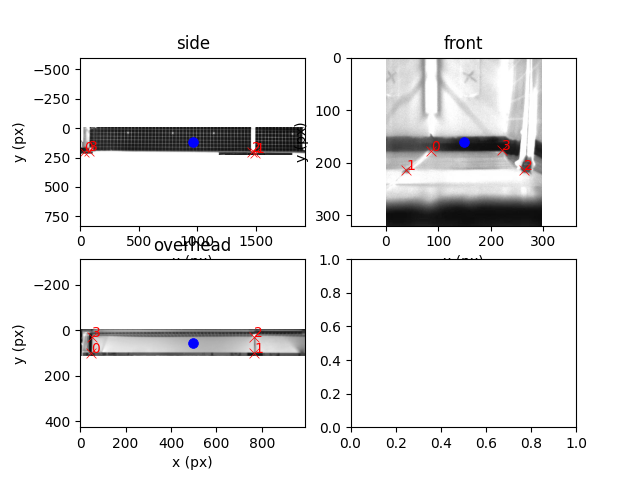

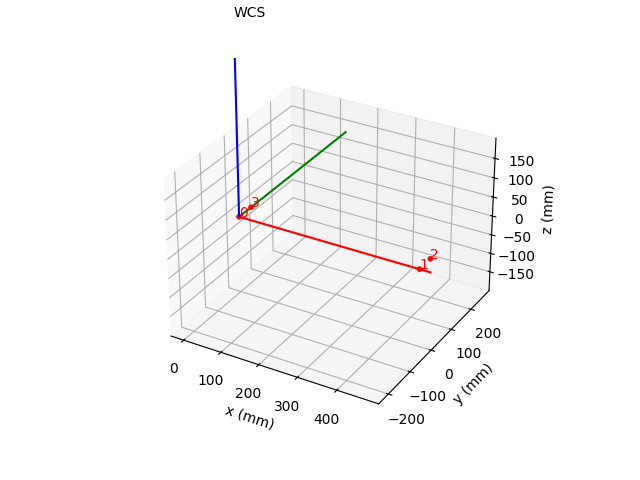

In [3]:
# Belt points
belt_pts = BeltPoints()
belt_coords_CCS = belt_pts.coords_CCS
belt_coords_WCS = belt_pts.coords_WCS

# Check belt points in CCS (1-3)
belt_pts.plot_CCS(cameras)

# Check belt points in WCS 
belt_pts.plot_WCS()



In [4]:
# Estimate pose via PnP

cameras_extrinsics = cameras.compute_cameras_extrinsics(
    belt_coords_WCS, 
    belt_coords_CCS
)

print('Reprojection errors:')
[(cam, cameras_extrinsics[cam]['repr_err']) for cam in cameras_extrinsics]



Reprojection errors:


[('side', 1.0098003661683541),
 ('front', 6.204818549543396),
 ('overhead', 1.4152248970214958)]

In [5]:
# Estimate with initial guess

cameras_extrinsics_ini_guess = cameras.compute_cameras_extrinsics(
    belt_coords_WCS, 
    belt_coords_CCS,
    use_extrinsics_ini_guess=True
)

print('Reprojection errors (w/ initial guess):')
[(cam, cameras_extrinsics_ini_guess[cam]['repr_err']) for cam in cameras_extrinsics_ini_guess]



Reprojection errors (w/ initial guess):


[('side', 1.0098003662372552),
 ('front', 6.204818488781063),
 ('overhead', 1.4152249123945568)]

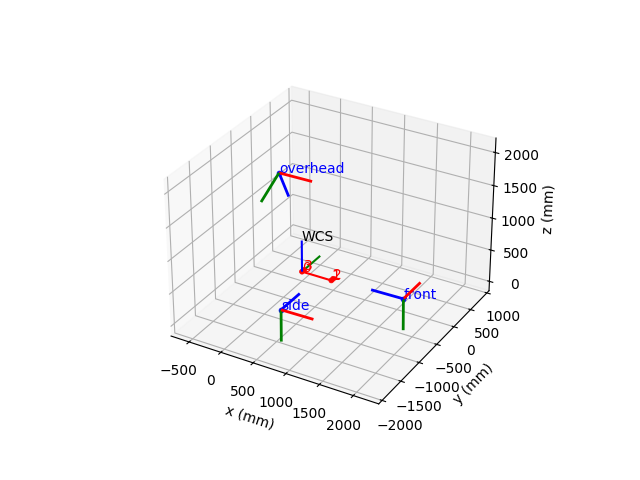

In [6]:
# Plot camera locations and pose --- REVIEW rotm convention!
# opencv: in rows, rotated versors
# my def: in columns, rotated versors of WCS

fig, ax = belt_pts.plot_WCS()

for cam in cameras.specs:
    
    rot_cam_my_def = cameras_extrinsics[cam]['rotm'].T

    rot_cam_opencv = cameras_extrinsics[cam]['rotm']
    cob_cam_opencv = cameras_extrinsics[cam]['rotm'].T  # change of basis, ok?§

    vec_WCS_to_CCS = - cob_cam_opencv @ cameras_extrinsics[cam]['tvec']

    # add scatter
    ax.scatter(
        vec_WCS_to_CCS[0],
        vec_WCS_to_CCS[1],
        vec_WCS_to_CCS[2],
        s=50,
        c="b",
        marker=".",
        linewidth=0.5,
        alpha=1,
    )
    # ax.axis("auto")

    # # add text§
    ax.text(
        vec_WCS_to_CCS[0,0],
        vec_WCS_to_CCS[1,0],
        vec_WCS_to_CCS[2,0],
        s=cam,
        c="b",
    )

    # add pose
    for row, color in zip(rot_cam_opencv, ["r", "g", "b"]): # rot_cam_my_def.T
        ax.quiver(
            vec_WCS_to_CCS[0],
            vec_WCS_to_CCS[1],
            vec_WCS_to_CCS[2],
            row[0],
            row[1],
            row[2],
            color=color,
            length=500,
            arrow_length_ratio=0,
            normalize=True,
            linewidth=2,
        )
        ax.axis("equal")



In [7]:
# Multi-view triangulation
# https://github.com/strawlab/pymvg/tree/master

# This repo is educational but quite nice
# https://github.com/nbhr/pycalib/blob/master/ipynb/ncam_triangulate.ipynb
# https://github.com/nbhr/pycalib/blob/5559e1742f29a5a547c39347825c9acc9c01f0ec/pycalib/calib.py#L307


# bundle adjustment: 
        # https://stackoverflow.com/questions/39745798/whats-the-conceptual-difference-between-bundle-adjustment-and-structure-from-mo
# https://github.com/nbhr/pycalib/blob/master/ipynb/ncam_ba.ipynb
# https://scipy-cookbook.readthedocs.io/items/bundle_adjustment.html
        



In [8]:
# Triangulate points -- opencv example
# only 2-by-2 in opencv
# https://gist.github.com/davegreenwood/e1d2227d08e24cc4e353d95d0c18c914
# x1 = np.array([[274.128, 624.409]])
# x2 = np.array([[239.571, 533.568]])

# P1 = np.array([[5.010e+03, 0.000e+00, 3.600e+02, 0.000e+00],
#                [0.000e+00, 5.010e+03, 6.400e+02, 0.000e+00],
#                [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]])

# P2 = np.array([[5.037e+03, -9.611e+01, -1.756e+03, 4.284e+03],
#                [2.148e+02,  5.354e+03,  1.918e+02, 8.945e+02],
#                [3.925e-01,  7.092e-02,  9.169e-01, 4.930e-01]])

# print('Triangulate 3d points - units in meters')
# # triangulatePoints requires 2xn arrays, so transpose the points
# p = cv2.triangulatePoints(P1, P2, x1.T, x2.T,)
# # however, homgeneous point is returned
# p /= p[3]
# print('Projected point from openCV:',  p.T)
